# Mushrooms: safe to eat or deadly?
----


In this project, we will employ several algorithms in order to predict whether a mushroom is poisonous or edible. We will explore the relationship between model complexity and generalization performance by adjusting key parameters of different supervised learning models for classification. The dataset we will be working with is from the [UCI Mushroom Data Set](http://archive.ics.uci.edu/ml/datasets/Mushroom?ref=datanews.io). It contains samples from 23 species of gilled mushrooms that are edible or poisonous. Note that the poisonous class includes mushrooms of unknown edibility and therefore not recommended.

The available features are:
- **cap-shape**: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s 
- **cap-surface**: fibrous=f, grooves=g, scaly=y, smooth=s 
- **cap-color**: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y 
- **bruises?**: bruises=t, no=f 
- **odor**: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s 
- **gill-attachment**: attached=a, descending=d, free=f, notched=n 
- **gill-spacing**: close=c, crowded=w, distant=d 
- **gill-size**: broad=b, narrow=n 
- **gill-color**: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y 
- **stalk-shape**: enlarging=e, tapering=t 
- **stalk-root**: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=? 
- **stalk-surface-above-ring**: fibrous=f, scaly=y, silky=k, smooth=s 
- **stalk-surface-below-ring**: fibrous=f, scaly=y, silky=k, smooth=s 
- **stalk-color-above-ring**: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
- **stalk-color-below-ring**: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
- **veil-type**: partial=p, universal=u 
- **veil-color**: brown=n, orange=o, white=w, yellow=y 
- **ring-number**: none=n, one=o, two=t 
- **ring-type**: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z 
- **spore-print-color**: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y 
- **population**: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y 
- **habitat**: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

In [1]:
import pandas as pd
import numpy as np
mush_df = pd.read_csv('mushrooms.csv')
mush_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


The data in the mushrooms dataset is currently encoded with strings. To work with Scikit-learn, we will encode these values to numeric using the pd.get_dummies() method.

In [2]:
# encoding string data to numeric
mush_df2= pd.get_dummies(mush_df)
mush_df2.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [3]:
from sklearn.model_selection import train_test_split

# getting X and y
X_mush= mush_df2.iloc[:,2:]
y_mush= mush_df2.iloc[:,1]

# splitting the dataset
X_train, X_test, y_train, y_test= train_test_split(X_mush, y_mush, random_state=0)

----
## Decision tree

We will start by training a Decision tree classifier with default parameters. What are the 5 most important features found by the decision tree?

In [4]:
from sklearn.tree import DecisionTreeClassifier

clf= DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

def important_features():
    features_list=[]
    for feature, importance in zip(X_train.columns, clf.feature_importances_):
        features_list.append((importance, feature))
    features_list.sort(reverse=True)
    return [feature[1] for feature in features_list[:5]]

important_features()

['odor_n', 'stalk-root_c', 'stalk-root_r', 'spore-print-color_r', 'odor_l']

We can calculate the accuracy of the Decision tree classifier for both the training and the test sets. 

In [5]:
def sets_accuracy():
    acc_train= clf.score(X_train, y_train)
    acc_test= clf.score(X_test, y_test)
    return (acc_train, acc_test)

sets_accuracy()

(1.0, 1.0)

Now let's have a look at the decision tree using graphviz.

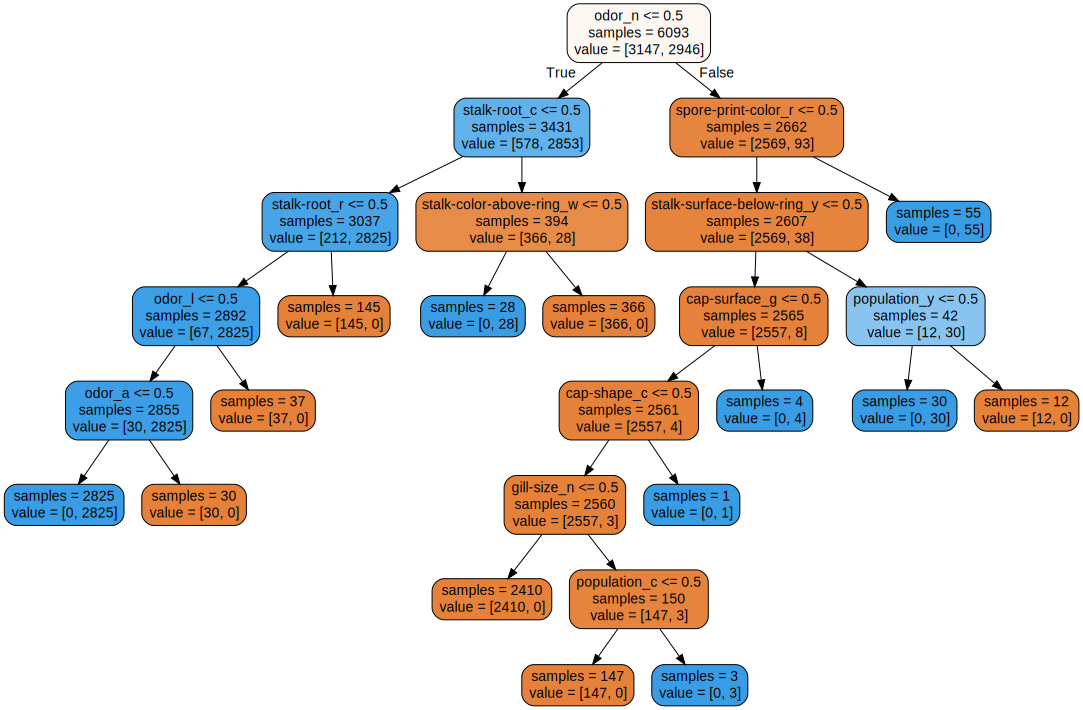

In [6]:
from sklearn import tree
import graphviz
from sklearn.tree import export_graphviz

dot_data= tree.export_graphviz(clf, feature_names=X_train.columns, out_file=None, filled=True, rounded=True, impurity=False) 
graph= graphviz.Source(dot_data)
graph

----
## Support Vector Classifier (SVC)

In this part of the project, we will use a validation curve to determine training and test scores for a SVC with different parameter values. 
We will train a SVC with default parameters (`kernel='rbf'` and `C=1`) and explore the effect of adjusting the `gamma` parameter, that controls the kernel width of the RBF kernel. We will use "accuracy" as the scoring metric.

We will then plot the mean score across the 3 models (`validation_curve` fits 3 models on different subsets of the data) to visualise the effect of tuning `gamma`.

In [7]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

def tuning_gamma():
    clf= SVC(kernel='rbf', C=1, random_state=0).fit(X_train, y_train)
    gamma_values= np.logspace(-4,1,6)
    
    # validation curve default: cv=3, scoring="accuracy"
    train_scores, test_scores= validation_curve(SVC(), X_train, y_train, param_name='gamma',\
                                                param_range=gamma_values)
    # getting the mean of the 3 folds
    mean_train_scores= train_scores.mean(axis=1)
    mean_test_scores= test_scores.mean(axis=1)
    return (mean_train_scores, mean_test_scores)

mean_train_scores, mean_test_scores= tuning_gamma()

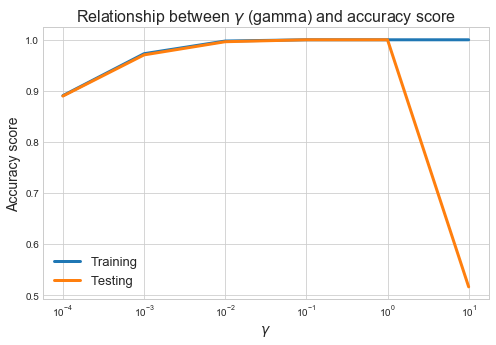

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

def plotting_curves():
    sns.set_style("whitegrid")
    plt.figure(figsize=(8,5))
    plt.semilogx(np.logspace(-4,1,6), mean_train_scores, lw=3, label='Training')
    plt.semilogx(np.logspace(-4,1,6), mean_test_scores, lw=3, label='Testing')
    plt.xlabel('$\gamma$', fontsize=14)
    plt.ylabel("Accuracy score", fontsize=14)
    plt.title("Relationship between $\gamma$ (gamma) and accuracy score", fontsize=16)
    plt.legend(fontsize=13)

plotting_curves()

From the above graph, we can tell that our model is overfitting at gamma=10. A choice of gamma=1 seems to be optimal since it brings the accuracy of both the training and the test sets close to 1. A model with such accuracy scores is very likely to perform well and generalise well.